<a href="https://colab.research.google.com/github/Leegyu66/-/blob/main/04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 확률적 경사 하강법
- 점진적 학습, 온라인 학습을 하기 위한 알고리즘
- 함수 아님

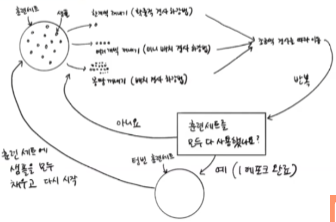

- 샘플을 무작위로 선택하여 경사가 내려감

## 로지스틱 손실 함수 (이진 크로스엔트로피 손실 함수)
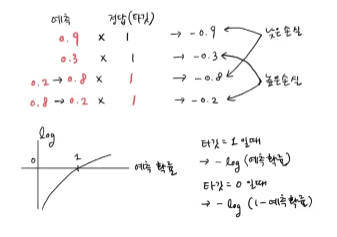
- 예측이 타깃과 가깝다면 낮은값으로 한다
- 예측이 타깃과 멀타면 높은값으로 한다
- 이런식으로 경사를 만드는 것이다.
- 손실이 낮은 쪽으로 가중치를 업데이트함

- 특성마다 스케일이 다르면 한 쪽으로 쏠릴 수 있기 때문에 반드시 데이터를 전처리 후 표준점수로 가공해줘야한다.

In [5]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) # 훈련 세트와 테스트 세트의 특성을 표준화 전처리한다.

In [8]:
from sklearn.linear_model import SGDClassifier # 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스
# 객체에 2개의 매개변수가 있음 (loss, max_iter)

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
# loss는 손실함수 지정 (log는 로지스틱 손실함수임)
# max_iter는 수행할 에포크 횟수(학습 횟수)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) # 에포크가 낮아서 충분히 학습을 하지 못함 -> 점수가 낮음음

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
sc.partial_fit(train_scaled, train_target) # partial_fit은 전에 훈련한 것을 유지하고 훈련함 (점진적 학습)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합
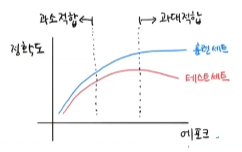
- 에포크를 너무 높이면 훈련 세트에는 잘 맞는데 테스트 세트에는 잘 맞지 않는 과대적합 발생
- 과대적합이 시작하기 직전에 훈련을 멈추는 것을 조기 종료하고 한다.

In [15]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # 중복없이 train_target 값을 classes에 저장 (['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


#### 300번의 에포크 동안 훈련을 반복하여 각 스코어 값을 리스트에 저장

In [16]:
for _ in range(0, 300): # _는 버리는 값임 (300번 반복을 위해 임시지정)
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

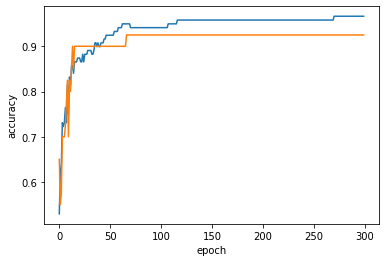

In [19]:
import  matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 점점 에포크가 늘 수록 과대적합되는 양상을 보임(에포크 100정도가 적당한 것 같다)

In [21]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [22]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


## 힌지 손실 사용

In [23]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
